<a href="https://colab.research.google.com/github/coryroyce/code_assignments/blob/main/211209_Frequent_Pattern_Mining_and_FPGrowth_Cory_Randolph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Frequent Pattern Mining and FP Growth
Cory Randolph

12/9/2021

Goal: Demonstrate Frequent Pattern Mining and also FGGrowth techniques



# Load Packages

Import basic packages for visualization

In [1]:
!pip install mlxtend
!pip install mlxtend --upgrade

# Clear output for this cell
from IPython.display import clear_output
clear_output()

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori,association_rules

# Frequent Pattern Mining and FPGrowth Overview

One common goal of Frequent Pattern Mining is to find rules showing the relations between various item sets. In particular we may ant to know how often two items from a grocery store are purchased together and some information around it.

Blow is a picture of common association rules/metrics:

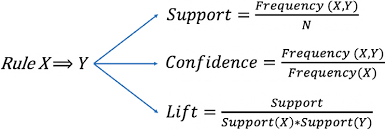

[Reference for picture](https://www.researchgate.net/publication/337999958_Patterns_of_User_Involvement_in_Experiment-Driven_Software_Development/figures?lo=1)

#Data

## Load Data

For this project we will be using the [Kaggle Groceries dataset](https://www.kaggle.com/irfanasrullah/groceries?select=groceries+-+groceries.csv)

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/coryroyce/code_assignments/main/211201_Market_Basket_Analysis_Apriori/data/groceries%20-%20groceries.csv')
df.head(3)

,Item(s),Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Item 8,Item 9,Item 10,Item 11,Item 12,Item 13,Item 14,Item 15,Item 16,Item 17,Item 18,Item 19,Item 20,Item 21,Item 22,Item 23,Item 24,Item 25,Item 26,Item 27,Item 28,Item 29,Item 30,Item 31,Item 32
0,4,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Clean Data

Clean and format the data so that it can be used as input for the algorithms

In [4]:
def clean_data(df):
  df_temp = df.copy()

  # Fill in missing values
  df_temp = df_temp.fillna('')

  # Drop Items col
  df_temp.drop(columns=['Item(s)'],inplace=True)

  return df_temp

Clean the data with the above function

In [5]:
df = clean_data(df)
df.head()

,Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Item 8,Item 9,Item 10,Item 11,Item 12,Item 13,Item 14,Item 15,Item 16,Item 17,Item 18,Item 19,Item 20,Item 21,Item 22,Item 23,Item 24,Item 25,Item 26,Item 27,Item 28,Item 29,Item 30,Item 31,Item 32
0,citrus fruit,semi-finished bread,margarine,ready soups,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,tropical fruit,yogurt,coffee,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,whole milk,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3,pip fruit,yogurt,cream cheese,meat spreads,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4,other vegetables,whole milk,condensed milk,long life bakery product,,,,,,,,,,,,,,,,,,,,,,,,,,,,


Further format the data with onehot encoding

In [6]:
df.shape

(9835, 32)

Create a list of transactions

In [7]:
list_of_transactions = []
for i in range(0, df.shape[0] ):
     list_of_transactions.append([str(df.values[i,j]) for j in range(0, df.shape[1])])

Apply one hot encoding as a dataframe

In [8]:
te = TransactionEncoder()
df_onehot = te.fit_transform(list_of_transactions)
df_onehot = pd.DataFrame(df_onehot, columns = te.columns_)
df_onehot.drop(columns=[''],inplace=True)

In [9]:
print(f'Shape of encoded data: {df_onehot.shape[0]} rows and {df_onehot.shape[1]} columns')

Shape of encoded data: 9835 rows and 169 columns


## Plot Data

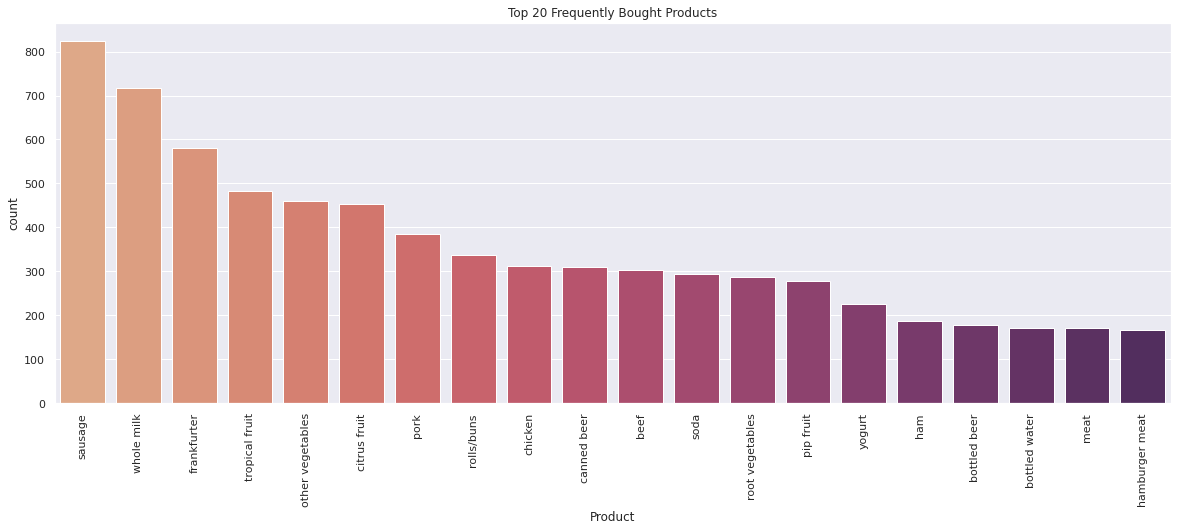

In [10]:
#Top 20 frequently buying items by customer
plt.rcParams['figure.figsize']=20,7
sns.countplot(data=df, x=df['Item 1'],
             order = df['Item 1'].value_counts().head(20).index,
             palette='flare')
plt.xticks(rotation=90)
plt.xlabel('Product')
plt.title('Top 20 Frequently Bought Products')
plt.show()

# Apply Apriori Algorithm

Use the onehot encoded transaction data as input to the Apriori algorithm

In [11]:
itemsets = apriori(df_onehot, min_support = 0.02, use_colnames = True)
itemsets

,support,itemsets
0,0.033452,(UHT-milk)
1,0.052466,(beef)
2,0.033249,(berries)
3,0.026029,(beverages)
4,0.080529,(bottled beer)
...,...,...
117,0.032232,"(whole milk, whipped/sour cream)"
118,0.020742,"(whipped/sour cream, yogurt)"
119,0.056024,"(whole milk, yogurt)"
120,0.023183,"(whole milk, root vegetables, other vegetables)"


Show the top 10 frequent item sets

In [13]:
frequent_itemsets = itemsets.sort_values(by=['support'], ascending=False)
top_ten_frequent_itemsets = frequent_itemsets[:10]
top_ten_frequent_itemsets

,support,itemsets
57,0.255516,(whole milk)
39,0.193493,(other vegetables)
43,0.183935,(rolls/buns)
49,0.174377,(soda)
58,0.139502,(yogurt)
5,0.110524,(bottled water)
44,0.108998,(root vegetables)
53,0.104931,(tropical fruit)
47,0.098526,(shopping bags)
46,0.093950,(sausage)


Generate association rules

In [14]:
from mlxtend.frequent_patterns import association_rules
rules = association_rules(frequent_itemsets, metric = "confidence", min_threshold = 0.2)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(whole milk),(other vegetables),0.255516,0.193493,0.074835,0.292877,1.513634,0.025394,1.140548
1,(other vegetables),(whole milk),0.193493,0.255516,0.074835,0.386758,1.513634,0.025394,1.214013
2,(whole milk),(rolls/buns),0.255516,0.183935,0.056634,0.221647,1.205032,0.009636,1.048452
3,(rolls/buns),(whole milk),0.183935,0.255516,0.056634,0.307905,1.205032,0.009636,1.075696
4,(whole milk),(yogurt),0.255516,0.139502,0.056024,0.219260,1.571735,0.020379,1.102157


In general, the antecedent is the product that is purchased first and the consequent is the second product purchased given the first one has already been purchased.

Display top results based on the lift

In [15]:
top_rules_by_list = rules.sort_values(by=['lift'], ascending=False)
top_rules_by_list[:10]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
52,(root vegetables),"(whole milk, other vegetables)",0.108998,0.074835,0.023183,0.212687,2.842082,0.015026,1.175091
50,"(whole milk, other vegetables)",(root vegetables),0.074835,0.108998,0.023183,0.309783,2.842082,0.015026,1.290900
71,(pip fruit),(tropical fruit),0.075648,0.104931,0.020437,0.270161,2.574648,0.012499,1.226392
49,"(whole milk, root vegetables)",(other vegetables),0.048907,0.193493,0.023183,0.474012,2.449770,0.013719,1.533320
8,(other vegetables),(root vegetables),0.193493,0.108998,0.047382,0.244877,2.246605,0.026291,1.179941
7,(root vegetables),(other vegetables),0.108998,0.193493,0.047382,0.434701,2.246605,0.026291,1.426693
56,"(whole milk, other vegetables)",(yogurt),0.074835,0.139502,0.022267,0.297554,2.132979,0.011828,1.225003
30,(whipped/sour cream),(other vegetables),0.071683,0.193493,0.028876,0.402837,2.081924,0.015006,1.350565
67,(whipped/sour cream),(yogurt),0.071683,0.139502,0.020742,0.289362,2.074251,0.010742,1.210881
55,"(whole milk, yogurt)",(other vegetables),0.056024,0.193493,0.022267,0.397459,2.054131,0.011427,1.338511


# Apply FP Growth

One negative point with the Apriori algorithm is that it needs multiple scans of the dataset in order to generate the association rules and the compound with very large data sets. 

In contrast the FP Growth algorithm constructs an FP tree by generating singletons, pairs, and triplets. The association rules can then be read directly from the FP tree and cut down on computation time.

Compute the frequent itemsets using FP Growth

In [16]:
from mlxtend.frequent_patterns.fpgrowth import fpgrowth
frequent_itemsets_fp = fpgrowth(df_onehot, min_support=0.02, use_colnames = True)

frequent_itemsets_fp.head()

,support,itemsets
0,0.082766,(citrus fruit)
1,0.058566,(margarine)
2,0.139502,(yogurt)
3,0.104931,(tropical fruit)
4,0.058058,(coffee)


Show the top 10 results

In [17]:
frequent_itemsets_fp= frequent_itemsets_fp.sort_values(by=['support'], ascending=False)
top_ten_frequent_itemsets_fp = frequent_itemsets_fp[:10]
top_ten_frequent_itemsets_fp

,support,itemsets
5,0.255516,(whole milk)
8,0.193493,(other vegetables)
11,0.183935,(rolls/buns)
19,0.174377,(soda)
2,0.139502,(yogurt)
14,0.110524,(bottled water)
28,0.108998,(root vegetables)
3,0.104931,(tropical fruit)
34,0.098526,(shopping bags)
33,0.093950,(sausage)


Calculate the association rules

In [18]:
rules_fp = association_rules(frequent_itemsets_fp, metric = "confidence", min_threshold = 0.2)
rules_fp.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(whole milk),(other vegetables),0.255516,0.193493,0.074835,0.292877,1.513634,0.025394,1.140548
1,(other vegetables),(whole milk),0.193493,0.255516,0.074835,0.386758,1.513634,0.025394,1.214013
2,(whole milk),(rolls/buns),0.255516,0.183935,0.056634,0.221647,1.205032,0.009636,1.048452
3,(rolls/buns),(whole milk),0.183935,0.255516,0.056634,0.307905,1.205032,0.009636,1.075696
4,(whole milk),(yogurt),0.255516,0.139502,0.056024,0.219260,1.571735,0.020379,1.102157


Display top results based on the lift

In [19]:
top_rules_by_list_fp = rules_fp.sort_values(by=['lift'], ascending=False)
top_rules_by_list_fp[:10]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
51,(root vegetables),"(whole milk, other vegetables)",0.108998,0.074835,0.023183,0.212687,2.842082,0.015026,1.175091
49,"(whole milk, other vegetables)",(root vegetables),0.074835,0.108998,0.023183,0.309783,2.842082,0.015026,1.290900
70,(pip fruit),(tropical fruit),0.075648,0.104931,0.020437,0.270161,2.574648,0.012499,1.226392
48,"(whole milk, root vegetables)",(other vegetables),0.048907,0.193493,0.023183,0.474012,2.449770,0.013719,1.533320
8,(other vegetables),(root vegetables),0.193493,0.108998,0.047382,0.244877,2.246605,0.026291,1.179941
7,(root vegetables),(other vegetables),0.108998,0.193493,0.047382,0.434701,2.246605,0.026291,1.426693
57,"(whole milk, other vegetables)",(yogurt),0.074835,0.139502,0.022267,0.297554,2.132979,0.011828,1.225003
30,(whipped/sour cream),(other vegetables),0.071683,0.193493,0.028876,0.402837,2.081924,0.015006,1.350565
67,(whipped/sour cream),(yogurt),0.071683,0.139502,0.020742,0.289362,2.074251,0.010742,1.210881
56,"(whole milk, yogurt)",(other vegetables),0.056024,0.193493,0.022267,0.397459,2.054131,0.011427,1.338511


# Concluding Note

Lets re-run the Apriori Algorithm and the FP Growth algorithm and compare the time to run.

In [20]:
%%time
temp_01 = apriori(df_onehot, min_support = 0.02, use_colnames = True)

CPU times: user 157 ms, sys: 6.39 ms, total: 163 ms
Wall time: 166 ms


In [21]:
%%time
temp_02 = fpgrowth(df_onehot, min_support=0.02, use_colnames = True)

CPU times: user 255 ms, sys: 11 ms, total: 266 ms
Wall time: 274 ms


In this case, both methods took about the same amount of time, but if the dataset size were to increase dramatically then the FP Growth method should start to show significantly less time to calculate.